# Customer Churn Prediction using Machine Learning

<p><b>About :</b> -</p>

<p><b>Course :</b> <a href=https://academy.dqlab.id/main/package/practice/249?pf=0>Customer Churn Prediction using Machine Learning</a></p>

<h2>Module Content:</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#pendahuluan">Pendahuluan</a></li>
        <li><a href="#library-dan-data-yang-digunakan">Library dan Data yang Digunakan</a></li>
        <li><a href="#melakukan-exploratory-data-analysis">Melakukan Exploratory Data Analysis (EDA)</a></li>
        <li><a href="#melakukan-data-preProcessing">Melakukan Data PreProcessing</a></li>
        <li><a href="#logistic-regression">Modelling: Logistic Regression</a></li>
        <li><a href="#random-forest-classifier">Modelling : Random Forest Classifier</a></li>
        <li><a href="#gradient-boosting-classifier">Modelling : Gradient Boosting Classifier</a></li>
        <li><a href="#memilih-model-terbaik">Memilih Model Terbaik</a></li>
    </ul>
</div>

<h2><a name="pendahuluan"></a>Chapter 1: Pendahuluan</h2>

Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning. Setelah sebelumnya kita mempersiapkan data sekaligus melakukan Cleansing, maka sekarang saatnya kita untuk membuat model yang tepat untuk memprediksi churn pelanggan.

Langkah yang akan dilakukan adalah:
<ol>
    <li>Melakukan Exploratory Data Analysis</li>
    <li>Melakukan Data Pre-Processing</li>
    <li>Melakukan Pemodelan Machine Learning</li>
    <li>Menentukan Model Terbaik</li>
</ol>

<h2><a name="library-dan-data-yang-digunakan"></a>Chapter 2: Library dan Data yang Digunakan</h2>

<h3><a name="library"></a>Library</h3>

Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data,
<ol>
    <li><b>Pandas</b> (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.</li>
    <ul>
        <li><code>read_csv()</code> digunakan untuk membaca file csv</li>
        <li><code>replace()</code> digunakan untuk mengganti nilai</li>
        <li><code>value_counts()</code> digunakan untuk mengitung unik dari kolom</li>
        <li><code>drop()</code> digunakan untuk menghapus</li>
        <li><code>describe()</code> digunakan untuk melihat deskripsi datanya</li>
        <li><code>value_counts()</code> digunakan untuk mengitung unik dari kolom</li>
    </ul>
    <li><b>Matplotlib</b> adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.</li>
    <ul>
        <li><code>figure()</code> digunakan untuk membuat figure gambar baru</li>
        <li><code>subplots()</code>digunakan untuk membuat gambar dan satu set subplot</li>
        <li><code>title()</code>digunakan untuk memberi judul pada gambar</li>
        <li><code>ylabel()</code>digunakan untuk memberi label sumbu Y pada gambar</li>
        <li><code>xlabel()</code>digunakan untuk memberi label sumbu Y pada gambar</li>
        <li><code>pie()</code>digunakan untuk membuat pie chart</li>
    </ul>
    <li><b>Seaborn</b> membangun plot di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat lebih cantik.</li>
    <ul>
        <li><code>countplot()</code> digunakan untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable</li>
        <li><code>heatmap()</code> Plot rectangular data as a color-encoded matrix</li>
    </ul>
    <li><b>Scikit-learn</b> adalah library dalam Python yang menyediakan banyak algoritma Machine Learning baik untuk Supervised, Unsupervised Learning, maupun digunakan untuk mempreparasi data.</li>
    <ul>
        <li><code>LabelEncoder()</code> digunakan untuk merubah nilai dari suatu variable menjadi 0 atau 1</li>
        <li><code>train_test_split()</code> digunakan untuk membagi data menjadi 2 row bagian (Training & Testing)</li>
        <li><code>LogisticRegression()</code> digunakan untuk memanggil algoritma Logistic Regression</li>
        <li><code>RandomForestClassifier()</code> digunakan untuk memanggil algoritma Random Forest Classifier</li>
        <li><code>confusion_matrix()</code> digunakan untuk membuat confusion matrix</li>
        <li><code>classification_report()</code> digunakan untuk membuat classification report, yang dianataranya berisi akurasi model</li>
    </ul>
    <li><b>Xgboost</b> adalah library dalam Python untuk algoritma extreme gradient boosting (xgboost)</li>
    <ul>
        <li><code>XGBClassifier()</code> digunakan untuk memanggil algoritma XG Boost Classifier</li>
    </ul>
    <li><b>Pickle</b> mengimplementasikan protokol biner untuk serializing dan de-serializing dari struktur objek Python.</li>
    <ul>
        <li><code>dump()</code> digunakan untuk menyimpan</li>
    </ul>
</ol>

In [1]:
#Import library yang dibutuhkan 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from pathlib import Path

<h3><a name="dataset"></a>Dataset</h3>

Source : https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv

Detail informasi dataset:
    <li><code>UpdatedAt</code> Periode of Data taken</li>
    <li><code>customerID</code> Customer ID</li>
    <li><code>gender</code> Whether the customer is a male or a female (Male, Female)</li>
    <li><code>SeniorCitizen</code> Whether the customer is a senior citizen or not (Yes, No)</li>
    <li><code>Partner</code> Whether the customer has a partner or not (Yes, No)</li>
    <li><code>tenure</code> Number of months the customer has stayed with the company</li>
    <li><code>PhoneService</code> Whether the customer has a phone service or not (Yes, No)</li>
    <li><code>InternetService</code> Customer’s internet service provider (Yes, No)</li>
    <li><code>StreamingTV</code> Whether the customer has streaming TV or not (Yes, No)</li>
    <li><code>PaperlessBilling</code> Whether the customer has paperless billing or not (Yes, No)</li>
    <li><code>MonthlyCharges</code> The amount charged to the customer monthly</li>
    <li><code>TotalCharges</code> The total amount charged to the customer</li>
    <li><code>Churn</code> Whether the customer churned or not (Yes, No)</li>

In [4]:
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

#Tampilkan bentuk dari dataset
print(df_load.shape)

#Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())

#Tampilkan 5 data teratas
df_load.head()

(6950, 13)
6950


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


<h2><a name="melakukan-exploratory-data-analysis"></a>Chapter 3: Melakukan Exploratory Data Analysis (EDA)</h2>

Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya. Pada umumnya EDA dilakukan dengan beberapa cara:

<ul>
    <li>Univariat Analysis — analisis deskriptif dengan satu variabel.</li>
    <li>Bivariat Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.</li>
    <li>Multivariat Analysis — analisis yang menggunakan lebih dari atau sama dengan tiga variabel.</li>
</ul>

Dalam kasus ini, kamu diminta untuk melihat persebaran dari:
<ul>
    <li>Prosentase persebaran data Churn dan tidaknya dari seluruh data</li>
    <li>Persebarang data dari variable predictor terhadap label (Churn)</li>
</ul>

<h4>Memvisualisasikan Prosentase Churn</h4>

Kita ingin melihat visualisasi data secara univariat terkait prosentase data churn dari pelanggan. Gunakan fungsi <code>value_counts()</code> untuk menghitung banyaknya unik dari sebuah kolom, <code>pie()</code> untuk membuat pie chart

In [10]:
df_load.Churn.value_counts()

No     5114
Yes    1836
Name: Churn, dtype: int64

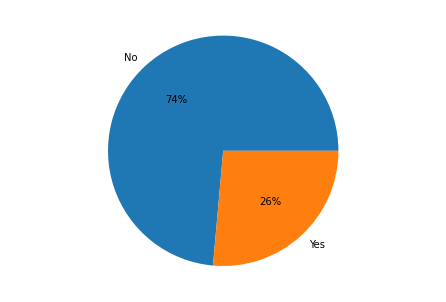

In [11]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('equal')
labels = df_load['Churn'].unique()
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.show()

<h4>Exploratory Data Analysis (EDA) Variabel Numerik</h4>

Hal yang akan kita lakukan selanjutnya adalah memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

Gunakan data <b>df_load</b> untuk di olah di tahap ini dan gunakan fungsi <code>subplots()</code> untuk membuat gambar dan satu set subplot.

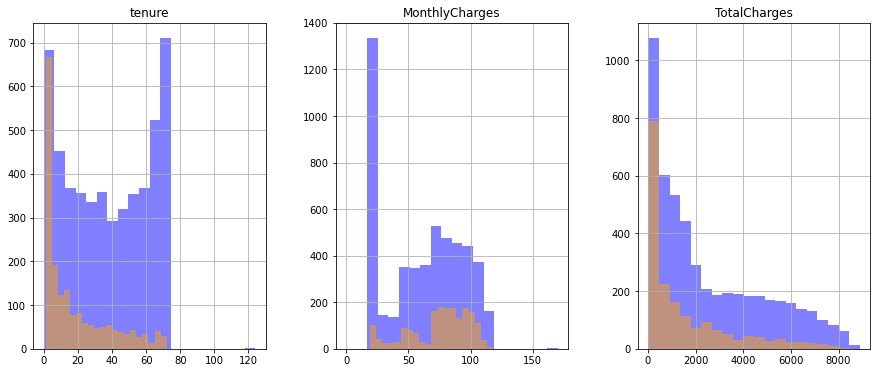

In [18]:
#creating bin in chart
numerical_features = [cname for cname in df_load.columns if df_load[cname].dtype in ['float64','int64']][2:]
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
# Use the following code to plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

<h4>Exploratory Data Analysis (EDA) Variabel Numerik</h4>

Setelah itu, kita akan melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat, kemudian menginterpretasikannya

Gunakan data <b>df_load</b> untuk di olah di tahap ini. Gunakan fungsi <code>countplot()</code> untuk membuat plot dengan jumlah pengamatan di setiap bin kategorik variable

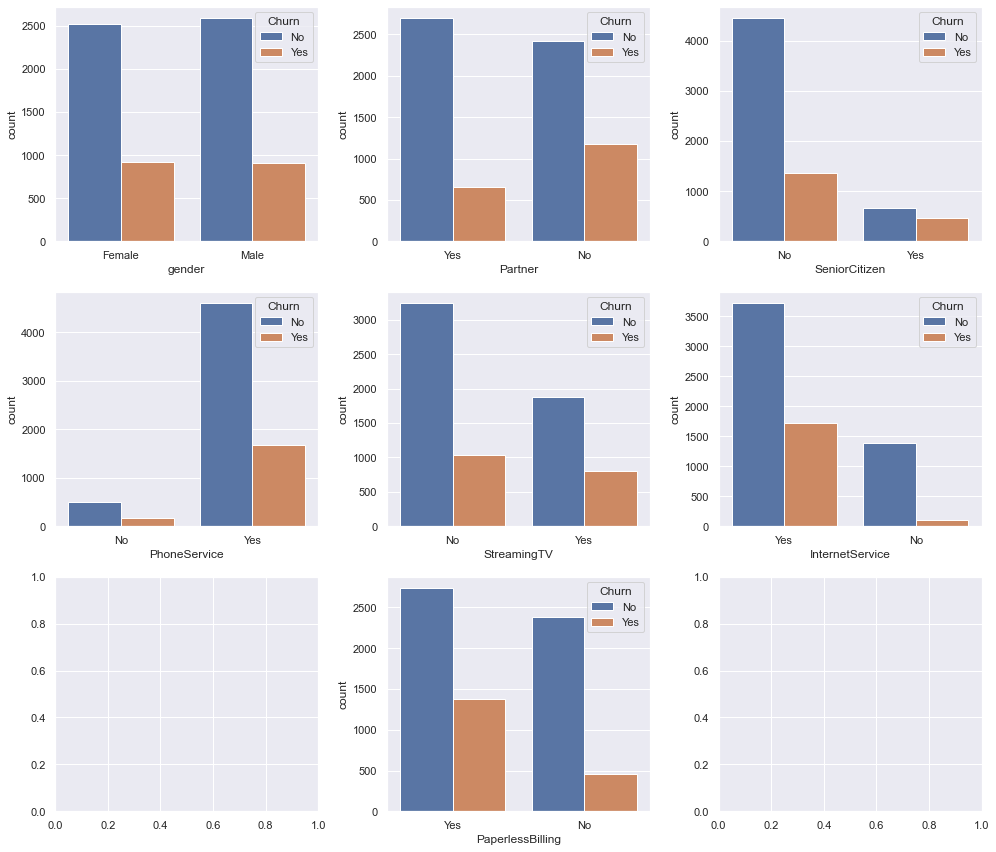

In [19]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

<b>Kesimpulan:</b> Berdasarkan hasil dan analisa di atas dapat disimpulkan:
<ul>
    <li>pada tahap <b>EDA.1</b> dapat kita ketahui bahwa sebaran data secara kesuluruhan customer tidak melakukan churn, dengan detil <b>Churn</b> sebanyak 26% dan <b>No Churn</b> sebanyak 74%.</li>
    <li>pada tahap <b>EDA.2</b> dapat kita ketahui bahwa untuk <b>MonthlyCharges</b> ada kecenderungan semakin kecil nilai biaya bulanan yang dikenakan, semakin kecil juga kecenderungan untuk melakukan <b>Churn</b>. Untuk <b>TotalCharges</b> terlihat tidak ada kecenderungan apapun terhadap <b>Churn</b> customers. Untuk <b>tenure</b> ada kecenderungan semakin lama berlangganan customer, semakin kecil kecenderungan untuk melakukan <b>Churn</b>.</li>
    <li>pada tahap <b>EDA.3</b> dapat kita ketahui bahwa tidak ada perbedaan yang signifikan untuk orang melakukan <b>churn</b> dilihat dari faktor jenis kelamin (<b>gender</b>) dan layanan telfonnya (<b>PhoneService</b>). Akan tetapi ada kecenderungan bahwa orang yang melakukan <b>churn</b> adalah orang-orang yang tidak memiliki partner (<b>partner: No</b>), orang-orang yang statusnya adalah senior citizen(<b>SeniorCitizen: Yes</b>), orang-orang yang mempunyai layanan streaming TV (<b>StreamingTV: Yes</b>), orang-orang yang mempunyai layanan Internet (<b>internetService: Yes</b>) dan orang-orang yang tagihannya paperless (<b>PaperlessBilling: Yes</b>).</li>
</ul>

<h2><a name="melakukan-data-preProcessing"></a>Chapter 4: Melakukan Data PreProcessing</h2>

<h4>Menghapus Unnecessary Columns dari data</h4>

Selanjutnya kita akan mengapus kolom yang tidak akan diikutsertakan dalam pemodelan, kemudian simpan dengan nama <b>cleaned_df</b>. Tampilkan 5 rows teratas nya.

Gunakan <code>drop()</code> untuk menghapus kolom dari suatu data

In [24]:
cleaned_df = df_load.drop(['UpdatedAt', 'customerID'], axis=1)
cleaned_df.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


<h4>Encoding Data</h4>

Gunakan data dari hasil dan analisa sebelumnya cleaned_df, untuk merubah value dari data yang masih berbentuk string untuk diubah ke dalam bentuk numeric menggunakan <code>LabelEncoder()</code>. Gunakan <code>describe()</code> untuk melihat deskripsi datanya.

In [25]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df.columns:
    if cleaned_df[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df[column] = LabelEncoder().fit_transform(cleaned_df[column])
print('Persebaran data setelah dilakukan encoding:')
cleaned_df.describe()

Persebaran data setelah dilakukan encoding:


,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000,6950.000000
mean,0.504317,0.162302,0.483309,32.415827,0.903741,0.384317,0.783453,0.591942,64.992201,2286.058750,0.264173
std,0.500017,0.368754,0.499757,24.561336,0.294967,0.486468,0.411921,0.491509,30.032040,2265.702553,0.440923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,36.462500,406.975000,0.000000
50%,1.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,1.000000,70.450000,1400.850000,0.000000
75%,1.000000,0.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3799.837500,1.000000
max,1.000000,1.000000,1.000000,73.000000,1.000000,1.000000,1.000000,1.000000,169.931250,8889.131250,1.000000


<h4>Splitting Dataset</h4>

Gunakan data dari hasil dan analisa sebelumnya <b>cleaned_df</b>, untuk dibagi datasetnya menjadi 2 bagian (70% training & 30% testing) berdasarkan variable predictor (<b>X</b>) dan targetnya (<b>Y</b>). Gunakan <code>train_test_split()</code> untuk membagi data tersebut. Sertakan <code>value_counts()</code> untuk mengecek apakah pembagian sudah sama proporsinya. Simpan hasil spliting data menjadi <b>x_train</b>, <b>y_train</b>, <b>x_test</b> & <b>y_test</b>

In [34]:
# Predictor dan target
X = cleaned_df.drop('Churn', axis=1)
y = cleaned_df['Churn']
# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape, 'sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)
print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('\nJumlah baris dan kolom dari x_test adalah:', x_test.shape, 'sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)
print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
0    0.734841
1    0.265159
Name: Churn, dtype: float64

Jumlah baris dan kolom dari x_test adalah: (2085, 10) sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
0    0.738129
1    0.261871
Name: Churn, dtype: float64


<b>Kesimpulan:</b> Setelah kita analisis lebih lanjut, ternyata ada kolom yang tidak dibutuhkuan dalam model, yaitu Id Number pelanggannya (<b>customerID</b>) & periode pengambilan datanya (<b>UpdatedAt</b>), maka hal ini perlu dihapus. Kemudian kita lanjut mengubah value dari data yang masih berbentuk string menjadi numeric melalui encoding, setelah dilakukan terlihat di persebaran datanya khususnya kolom min dan max dari masing masing variable sudah berubah menjadi 0 & 1. Tahap terakhir adalah membagi data menjadi 2 bagian untuk keperluan modelling, setelah dilakukan terlihat dari jumlah baris dan kolom masing-masing data sudah sesuai & prosentase kolom churn juga sama dengan data di awal, hal ini mengindikasikan bahwasannya data terpisah dengan baik dan benar.

<h2><a name="logistic-regression"></a>Chapter 5: Modelling: Logistic Regression</h2>

<h4>Pembuatan Model</h4>

Selanjutnya kita akan membuat model dengan menggunakan Algoritma Logistic Regression.

Gunakan <code>LogisticRegression()</code> memanggil algoritma tersebut, fit ke data train dan simpan sebagai <code>log_model</code>

In [39]:
log_model = LogisticRegression().fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<h4>Performansi Model Training</h4>

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data training. Gunakan <code>classification_report()</code> & <code>confusion_matrix()</code>.

In [43]:
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Logistic Regression) : \n',classification_report(y_train, y_train_pred))
print('Confusion Matrix Training Model (Logistic Regression) : \n',confusion_matrix(y_train, y_train_pred))

Classification Report Training Model (Logistic Regression) : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      3575
           1       0.65      0.49      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.72      4865
weighted avg       0.78      0.80      0.79      4865

Confusion Matrix Training Model (Logistic Regression) : 
 [[3237  338]
 [ 652  638]]


Setelah mendapatkan hasil classification report, sekarang kita akan melakukan visualisasi terhadap report tersebut. 

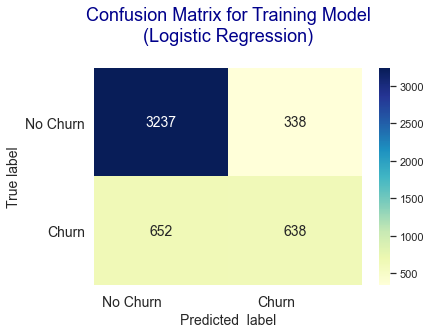

In [46]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted  label', fontsize=14)
plt.show()

<h4>Performansi Model Testing</h4>

Lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data testing. Gunakan <code>classification_report()</code> & <code>confusion_matrix()</code>.

In [47]:
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Logistic Regression) : \n',classification_report(y_test, y_test_pred))
print('Confusion Matrix Testing Model (Logistic Regression) : \n',confusion_matrix(y_test, y_test_pred))

Classification Report Testing Model (Logistic Regression) : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085

Confusion Matrix Testing Model (Logistic Regression) : 
 [[1393  146]
 [ 282  264]]


Setelah mendapatkan hasil classification report, sekarang kita akan melakukan visualisasi terhadap report tersebut. 

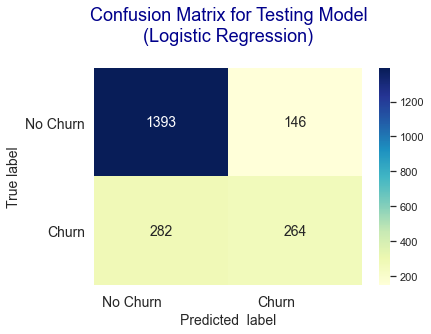

In [48]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted  label', fontsize=14)
plt.show()

<b>Kesimpulan:</b> Dari hasil dan analisa di atas, maka:
<ul>
    <li>Jika kita menggunakan menggunakan algoritma logistic regression dengan memanggil <code>LogisticRegression()</code> dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.</li>
    <li>Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 80%, dengan detil tebakan <b>churn</b> yang sebenernya <b>benar churn</b> adalah 638, tebakan <b>tidak churn</b> yang sebenernya <b>tidak churn</b> adalah 3237, tebakan <b>tidak churn</b> yang sebenernya <b>benar churn</b> adalah 652 dan tebakan <b>churn</b> yang sebenernya <b>tidak churn</b> adalah 338.</li>
    <li>Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan <b>churn</b> yang sebenernya <b>benar churn</b> adalah 264, tebakan <b>tidak churn</b> yang sebenernya <b>tidak churn</b> adalah 1392, tebakan <b>tidak churn</b> yang sebenernya <b>benar churn</b> adalah 282 dan tebakan <b>churn</b> yang sebenernya <b>tidak churn</b> adalah 146.</li>
</ul>

<h2><a name="random-forest-classifier"></a>Chapter 6: Modelling : Random Forest Classifier</h2>

<h4>Pembuatan Model</h4>

Selanjutnya kita akan membuat model dengan menggunakan Algoritma Random Forest Classifier.

Gunakan <code>RandomForestClassifier()</code> memanggil algoritma tersebut, fit ke data train dan simpan sebagai <code>rdf_model</code>

In [62]:
#Train the model
rdf_model = RandomForestClassifier().fit(x_train, y_train)
print(rdf_model)

RandomForestClassifier()


<h4>Performansi Model Training</h4>

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data training. Gunakan <code>classification_report()</code> & <code>confusion_matrix()</code>.

In [63]:
# Predict
y_train_pred = rdf_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Random Forest) : \n',classification_report(y_train, y_train_pred))
print('Confusion Matrix Training Model (Random Forest) : \n',confusion_matrix(y_train, y_train_pred))

Classification Report Training Model (Random Forest) : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       0.99      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865

Confusion Matrix Training Model (Random Forest) : 
 [[3568    7]
 [  14 1276]]


Setelah mendapatkan hasil classification report, sekarang kita akan melakukan visualisasi terhadap report tersebut. 

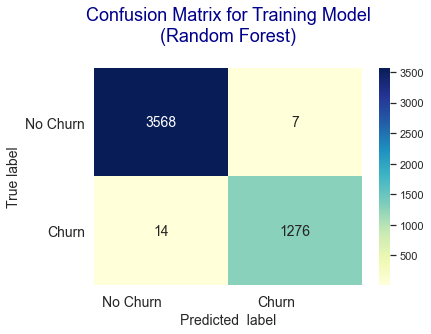

In [64]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted  label', fontsize=14)
plt.show()

<h4>Performansi Model Testing</h4>

Lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data testing. Gunakan <code>classification_report()</code> & <code>confusion_matrix()</code>.

In [65]:
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Random Forest) : \n',classification_report(y_test, y_test_pred))
print('Confusion Matrix Testing Model (Random Forest) : \n',confusion_matrix(y_test, y_test_pred))

Classification Report Testing Model (Random Forest) : 
               precision    recall  f1-score   support

           0       0.82      0.88      0.85      1539
           1       0.59      0.47      0.52       546

    accuracy                           0.78      2085
   macro avg       0.71      0.68      0.69      2085
weighted avg       0.76      0.78      0.77      2085

Confusion Matrix Testing Model (Random Forest) : 
 [[1361  178]
 [ 290  256]]


Setelah mendapatkan hasil classification report, sekarang kita akan melakukan visualisasi terhadap report tersebut. 

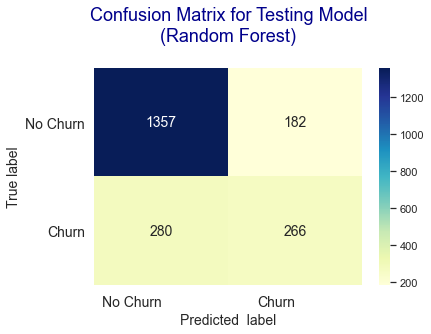

In [61]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted  label', fontsize=14)
plt.show()

<b>kesimpulan:</b>Dari hasil dan analisa di atas, maka:
<ul>
<li>Jika kita menggunakan menggunakan algoritma Random Forest dengan memanggil <code>RandomForestClassifier()</code> dari sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.</li>
<li>Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 100%, dengan detil tebakan <b>churn</b> yang sebenernya <b>benar churn</b> adalah 1276, tebakan <b>tidak churn</b> yang sebenernya <b>tidak churn</b> adalah 3568, tebakan <b>tidak churn</b> yang sebenernya <b>benar churn</b> adalah 14 dan tebakan <b>churn</b> yang sebenernya <b>tidak churn</b> adalah 7.</li>
<li>Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 78%, dengan detil tebakan <b>churn</b> yang sebenernya <b>benar churn</b> adalah 266, tebakan <b>tidak churn</b> yang sebenernya <b>tidak churn</b> adalah 1357, tebakan <b>tidak churn</b> yang sebenernya <b>benar churn</b> adalah 280 dan tebakan <b>churn</b> yang sebenernya <b>tidak churn</b> adalah 182.</li>
</ul>

<h2><a name="gradient-boosting-classifier"></a>Chapter 7: Modelling : Gradient Boosting Classifier</h2>

<h4>Pembuatan Model</h4>

Selanjutnya kita akan membuat model dengan menggunakan Algoritma Gradient Boosting Classifier.

Gunakan <code>GradientBoostingClassifier()</code> memanggil algoritma tersebut, fit ke data train dan simpan sebagai <code>gbt_model</code>

In [66]:
#Train the model
gbt_model = GradientBoostingClassifier().fit(x_train, y_train)
print(gbt_model)

GradientBoostingClassifier()


<h4>Performansi Model Training</h4>

Setelah kita membuat modelnya, maka lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data training. Gunakan <code>classification_report()</code> & <code>confusion_matrix()</code>.

In [67]:
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report 
print('Classification Report Training Model (Random Forest) : \n',classification_report(y_train, y_train_pred))
print('Confusion Matrix Training Model (Random Forest) : \n',confusion_matrix(y_train, y_train_pred))

Classification Report Training Model (Random Forest) : 
               precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865

Confusion Matrix Training Model (Random Forest) : 
 [[3286  289]
 [ 606  684]]


Setelah mendapatkan hasil classification report, sekarang kita akan melakukan visualisasi terhadap report tersebut. 

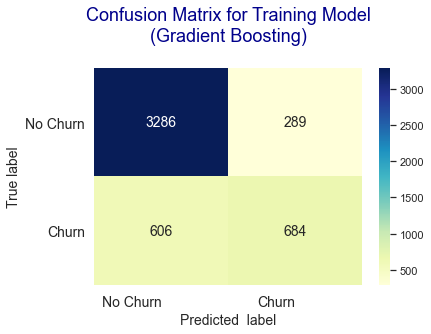

In [68]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted  label', fontsize=14)
plt.show()

<h4>Performansi Model Testing</h4>

Lakukan perhitungan untuk memperoleh classification reportnya dan confusion matrixnya di data testing. Gunakan <code>classification_report()</code> & <code>confusion_matrix()</code>.

In [69]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report 
print('Classification Report Testing Model (Gradient Boosting) : \n',classification_report(y_test, y_test_pred))
print('Confusion Matrix Testing Model (Gradient Boosting) : \n',confusion_matrix(y_test, y_test_pred))

Classification Report Testing Model (Gradient Boosting) : 
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085

Confusion Matrix Testing Model (Gradient Boosting) : 
 [[1394  145]
 [ 285  261]]


Setelah mendapatkan hasil classification report, sekarang kita akan melakukan visualisasi terhadap report tersebut. 

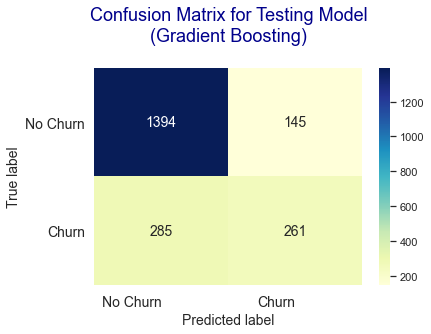

In [70]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Churn', 'Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

<b>kesimpulan:</b>Dari hasil dan analisa di atas, maka:
<ul>
    <li>Jika kita menggunakan menggunakan algoritma Gradient Boosting dengan memanggil GradientBoostingClassifier() dari package sklearn tanpa menambahi parameter apapun, maka yang dihasilkan adalah model dengan seting default dari sklearn, untuk detilnya bisa dilihat di dokumentasinya.</li>
    <li>Dari data training terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 82%, dengan detil tebakan <b>churn</b> yang sebenernya <b>benar churn</b> adalah 684, tebakan <b>tidak churn</b> yang sebenernya <b>tidak churn</b> adalah 3286, tebakan <b>tidak churn</b> yang sebenernya <b>benar churn</b> adalah 606 dan tebakan <b>churn</b> yang sebenernya <b>tidak churn</b> adalah 289.</li>
    <li>Dari data testing terlihat bahwasannya model mampu memprediksi data dengan menghasilkan akurasi sebesar 79%, dengan detil tebakan <b>churn</b> yang sebenernya <b>benar churn</b> adalah 261, tebakan <b>tidak churn</b> yang sebenernya <b>tidak churn</b> adalah 1394, tebakan <b>tidak churn</b> yang sebenernya <b>benar churn</b> adalah 285 dan tebakan <b>churn</b> yang sebenernya <b>tidak churn</b> adalah 145.</li>
</ul>

<h2><a name="memilih-model-terbaik"></a>Chapter 6: Memilih Model Terbaik</h2>

Model yang baik adalah model yang mampu memberikan performa bagus di fase training dan testing model.

<ul>
    <li><b>Over-Fitting</b> adalah suatu kondisi dimana model mampu memprediksi dengan sangat baik di fase training, akan tetapi tidak mampu memprediksi sama baiknya di fase testing.</li>
    <li><b>Under-Fitting</b> adalah suatu kondisi dimana model kurang mampu memprediksi dengan baik di fase training, akan tetapi mampu memprediksi dengan baik di fase testing.</li>
    <li><b>Appropriate-Fitting</b> adalah suatu kondisi dimana model mampu memprediksi dengan baik di fase training maupun di fase testing.</li>
</ul>

Untuk detil jelasnya, bisa dilihat di ilustrasi di bawah ini:

<img src='./Resources/grafik_performa_model.png'>

Selanjutnya kita akan menentukan model algoritma terbaik dari model yang sudah di lakukan di atas (Appropriate-Fitting), kemudian kita simpan sebagai file best_model_churn.pkl dengan tujuan untuk deployment model nantinya kita tidak perlu mengulang lagi pemodelan, cukup memanggil file tersebut saja.

Simpan di file direktori sesuai dataset berada, kemudian check apakah file tersebut benar tersimpan atau tidak. Gunakan <code>dump()</code> dari pickle untuk menyimpan file. Anda bisa gunakan code dibawah ini untuk menyimpan file model untuk di coba di local laptop anda pribadi.

In [72]:
#Save Model
pickle.dump(log_model, open('./Resources/best_model_churn.pkl', 'wb'))

<b>kesimpulan:</b> Berdasarkan pemodelan yang telah dilakukan dengan menggunakan <b>Logistic Regression</b>, Random Forest dan Extreme Gradiant Boost, maka dapat disimpulkan untuk memprediksi churn dari pelanggan telco dengan menggunakan dataset ini model terbaiknya adalah menggunakan algortima Logistic Regression. Hal ini dikarenakan performa dari model Logistic Regression cenderung mampu memprediksi sama baiknya di fase training maupun testing (akurasi training 80%, akurasi testing 79%), dilain sisi algoritma lainnya cenderung Over-Fitting performanya. Akan tetapi hal ini <b><i>tidak</i></b> menjadikan kita untuk menarik kesimpulan bahwsannya jika untuk melakukan pemodelan apapun maka digunakan Logistic Regression, kita tetap harus melakukan banyak percobaan model untuk menentukan mana yang terbaik.